In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Data Formatting and Preprocessing

In [2]:
data = pd.read_csv('aggregated_dataset_updated_with_time_v2.csv',dtype={'zipcode':'str'})
data = data.set_index('datetime').drop(columns=['zipcode', 'datetime.1', 'change', 'date', 'parking_size', 'num_of_muni'])
data.sort_index(inplace=True)

In [3]:
data.columns

Index(['rental', 'time', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd',
       'pres', 'Business Day', 'Holiday', 'Spring', 'Summer', 'Fall', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'Hour', 'Days Passed', 'Commute In',
       'Commute Out'],
      dtype='object')

In [4]:
data.head()

,rental,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,Business Day,...,June,July,August,September,October,November,Hour,Days Passed,Commute In,Commute Out
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,3,0,11.7,9.4,86,0.0,60.0,9.4,1022.4,0,...,0,0,0,0,0,0,0.0,0,0,0
2018-01-01 00:00:00,0,0,11.7,9.4,86,0.0,60.0,9.4,1022.4,0,...,0,0,0,0,0,0,0.0,0,0,0
2018-01-01 00:00:00,1,0,11.7,9.4,86,0.0,60.0,9.4,1022.4,0,...,0,0,0,0,0,0,0.0,0,0,0
2018-01-01 00:00:00,20,0,11.7,9.4,86,0.0,60.0,9.4,1022.4,0,...,0,0,0,0,0,0,0.0,0,0,0
2018-01-01 00:00:00,2,0,11.7,9.4,86,0.0,60.0,9.4,1022.4,0,...,0,0,0,0,0,0,0.0,0,0,0


In [5]:
agg_dict = {}
agg_dict['rental'] = 'sum'
for i in range(1, 8):
    agg_dict[data.columns[i]] = 'mean'

for i in range(8, len(data.columns)):
    agg_dict[data.columns[i]] = 'max'

In [6]:
agg_data = data.groupby('datetime').agg(agg_dict)

In [7]:
agg_data = agg_data[:'2019-07-01']

In [8]:
agg_data.head()

,rental,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,Business Day,...,June,July,August,September,October,November,Hour,Days Passed,Commute In,Commute Out
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,56,0,11.7,9.4,86,0.0,60.0,9.4,1022.4,0,...,0,0,0,0,0,0,0.0,0,0,0
2018-01-01 01:00:00,44,1,11.1,9.4,89,0.0,140.0,7.6,1022.6,0,...,0,0,0,0,0,0,1.0,0,0,0
2018-01-01 02:00:00,33,2,10.6,8.4,86,0.0,0.0,0.0,1022.6,0,...,0,0,0,0,0,0,2.0,0,0,0
2018-01-01 03:00:00,11,3,8.9,7.2,89,0.0,0.0,0.0,1022.7,0,...,0,0,0,0,0,0,3.0,0,0,0
2018-01-01 04:00:00,1,4,8.3,6.8,90,0.0,280.0,7.6,1022.8,0,...,0,0,0,0,0,0,4.0,0,0,0


In [9]:
agg_data['pres'].fillna(method='ffill',inplace=True)

In [10]:
agg_data.drop(columns='Days Passed', inplace=True)

In [11]:
hours = agg_data['Hour']
agg_data.drop(columns='Hour', inplace=True)
agg_data['Hour'] = hours

In [12]:
agg_data.columns

Index(['rental', 'time', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd',
       'pres', 'Business Day', 'Holiday', 'Spring', 'Summer', 'Fall', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'Commute In', 'Commute Out',
       'Hour'],
      dtype='object')

In [45]:
# Checkpoint 1
# n = agg_data.shape[0]
# split = 0.8
# step = 1
# past = 120
# future = 12
# learning_rate = 0.001
# batch_size = 32
# epochs = 20
# train_split = int(agg_data.shape[0]*split)

In [58]:
# Checkpoint 2
# n = agg_data.shape[0]
# split = 0.8
# step = 1
# past = 120
# future = 6
# learning_rate = 0.001
# batch_size = 64
# epochs = 20
# train_split = int(agg_data.shape[0]*split)

In [81]:
# Checkpoint 3
n = agg_data.shape[0]
split = 0.8
step = 1
past = 120
future = 1
learning_rate = 0.001
batch_size = 32
epochs = 20
train_split = int(agg_data.shape[0]*split)

In [59]:
cont_features = agg_data.columns[:9]
clas_features = agg_data.columns[9:11].append(agg_data.columns[14:20])
cont_data = agg_data[cont_features]
clas_data = agg_data[clas_features]

In [60]:
train_mean = cont_data.iloc[:train_split].mean()
train_std = cont_data.iloc[:train_split].std()
feature_data = ((cont_data - train_mean)/train_std).join(clas_data)

In [61]:
train_data = feature_data.iloc[:train_split]
test_data = feature_data.iloc[train_split:]

# Training Data

In [82]:
start = past + future
end = start + train_split

x_train = train_data
y_train = feature_data.iloc[start:end]['rental']

sequence_length = int(past / step)

In [83]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    batch_size=batch_size,
)

# Test Data

In [84]:
x_end = len(test_data) - past - future

label_start = train_split + past + future

x_test = test_data.iloc[:x_end].values
y_test = feature_data.iloc[label_start:]['rental']

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)


Input shape: (32, 120, 17)
Target shape: (32,)


# Training

In [85]:
np.random.seed(42)
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
gru_1 = keras.layers.GRU(32, return_sequences=True)(inputs)
gru_out = keras.layers.GRU(16)(gru_1)
outputs = keras.layers.Dense(1)(gru_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120, 17)]         0         
                                                                 
 gru_10 (GRU)                (None, 120, 32)           4896      
                                                                 
 gru_11 (GRU)                (None, 16)                2400      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,313
Trainable params: 7,313
Non-trainable params: 0
_________________________________________________________________


In [86]:
path_checkpoint = "model_checkpoint_3.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=4)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_test,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/20
323/324 [============================>.] - ETA: 0s - loss: 0.5386
Epoch 00001: val_loss improved from inf to 0.74004, saving model to model_checkpoint_3.h5
324/324 [==============================] - 19s 52ms/step - loss: 0.5400 - val_loss: 0.7400
Epoch 2/20
324/324 [==============================] - ETA: 0s - loss: 0.3165
Epoch 00002: val_loss improved from 0.74004 to 0.51241, saving model to model_checkpoint_3.h5
324/324 [==============================] - 17s 52ms/step - loss: 0.3165 - val_loss: 0.5124
Epoch 3/20
324/324 [==============================] - ETA: 0s - loss: 0.1634
Epoch 00003: val_loss improved from 0.51241 to 0.28099, saving model to model_checkpoint_3.h5
324/324 [==============================] - 16s 50ms/step - loss: 0.1634 - val_loss: 0.2810
Epoch 4/20
323/324 [============================>.] - ETA: 0s - loss: 0.1084
Epoch 00004: val_loss improved from 0.28099 to 0.20891, saving model to model_checkpoint_3.h5
324/324 [==============================] - 17s 

In [30]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

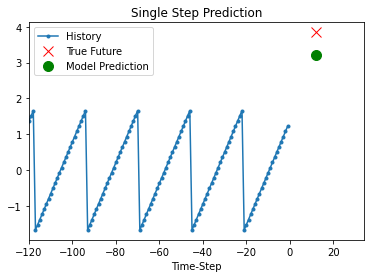

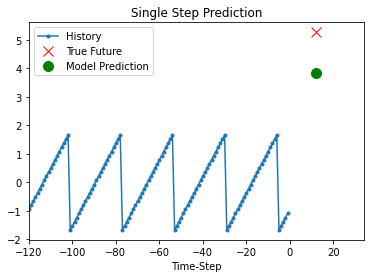

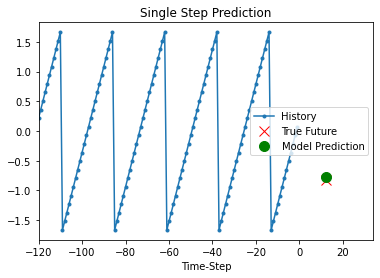

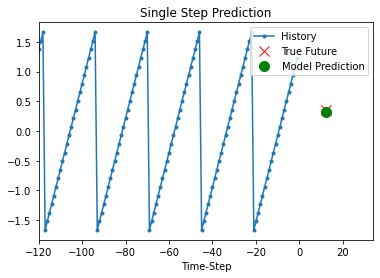

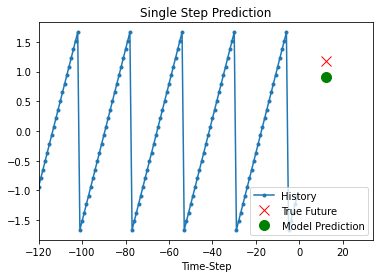

In [31]:
for x, y in dataset_test.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        future,
        "Single Step Prediction",
    )

In [54]:
mse_loss = []
mse_loss.append(0.1529)

In [88]:
mse_loss.append(model.evaluate(dataset_test))

75/75 [==============================] - 1s 11ms/step - loss: 0.1244


In [89]:
predictions = model.predict(dataset_test)

In [90]:
predictions.shape

(2378, 1)

In [91]:
y_test.shape

(2497,)

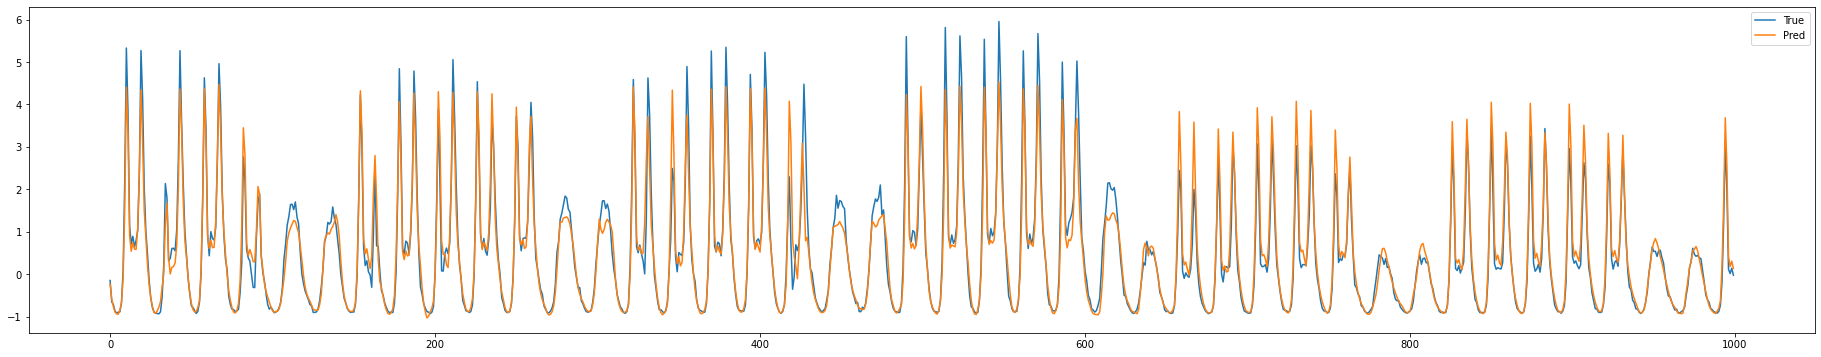

In [92]:
plt.figure(figsize=(32,6))
plt.plot(range(y_test[:1000].shape[0]), y_test[:1000], label='True')
plt.plot(range(y_test[:1000].shape[0]), predictions[:1000], label='Pred')
plt.legend()
plt.show()

In [76]:
agg_data['rental'].max()

1642

In [98]:
def Rsquared_from_mse(mse):
    n = y_test.shape[0]
    baseline = np.sum((y_test-y_train.mean())**2)
    Rsquared = 1 - n*mse/baseline
    
    return Rsquared

In [99]:
Rsquared_from_mse(min(mse_loss))

0.9234907267136307